In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cg_df = pd.read_csv("Processed_Iowa+Cerro+Gordo_1960+2009_Annual+Crop.csv")

In [3]:
year_freq_values = cg_df["Year"].value_counts()
print(f'Least frequent year to appear in data: {year_freq_values.index[-1]}')

Least frequent year to appear in data: 1963


In [4]:
# Looking at the least frequently occuring year
year_cg_df = cg_df[cg_df["Year"] == year_freq_values.index[-1]]
print(year_cg_df.to_string())

    Program  Year Period Geo Level State    Ag District       County Commodity                                   Data Item Domain Category       Value
921  SURVEY  1963   YEAR    COUNTY  IOWA  NORTH CENTRAL  CERRO GORDO      CORN                        CORN - ACRES PLANTED   NOT SPECIFIED     140,000
922  SURVEY  1963   YEAR    COUNTY  IOWA  NORTH CENTRAL  CERRO GORDO      CORN               CORN, GRAIN - ACRES HARVESTED   NOT SPECIFIED     133,300
923  SURVEY  1963   YEAR    COUNTY  IOWA  NORTH CENTRAL  CERRO GORDO      CORN    CORN, GRAIN - PRODUCTION, MEASURED IN BU   NOT SPECIFIED  10,166,000
924  SURVEY  1963   YEAR    COUNTY  IOWA  NORTH CENTRAL  CERRO GORDO      CORN  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE   NOT SPECIFIED        76.3
925  SURVEY  1963   YEAR    COUNTY  IOWA  NORTH CENTRAL  CERRO GORDO  SOYBEANS                  SOYBEANS - ACRES HARVESTED   NOT SPECIFIED      46,700
926  SURVEY  1963   YEAR    COUNTY  IOWA  NORTH CENTRAL  CERRO GORDO  SOYBEANS       SOYBEANS 

In [5]:
# Unique commodity values
year_cg_df["Commodity"].value_counts()

CORN        4
SOYBEANS    3
Name: Commodity, dtype: int64

In [6]:
# Collecting the above into distinct vars
commodityOne = year_cg_df["Commodity"].value_counts().index[0]
commodityTwo = year_cg_df["Commodity"].value_counts().index[1]

In [7]:
# Creating new dataframe with most common commodity across all years
crop_common_df = cg_df[cg_df["Commodity"].isin([commodityOne, commodityTwo])]

print(f'Number of items in new dataframe: {len(crop_common_df.index)}')

Number of items in new dataframe: 512


In [8]:
crop_data_df = crop_common_df[crop_common_df["Data Item"].str.contains(" / ACRE")]

In [9]:
# Running quick counts
print(f'Number of columns: {len(crop_data_df.columns)}')
print(f'Number of rows: {len(crop_data_df.index)}')
print(f'Number of unique commodities: {crop_data_df["Commodity"].nunique()}')
print(f'Number of unique data items: {crop_data_df["Data Item"].nunique()}')

Number of columns: 11
Number of rows: 141
Number of unique commodities: 2
Number of unique data items: 3


In [10]:
# Unique data items
crop_data_df["Data Item"].value_counts()

SOYBEANS - YIELD, MEASURED IN BU / ACRE          50
CORN, GRAIN - YIELD, MEASURED IN BU / ACRE       50
CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE    41
Name: Data Item, dtype: int64

In [12]:
# Splitting the data off
corn_grain_data = crop_data_df[crop_data_df["Data Item"] == "CORN, GRAIN - YIELD, MEASURED IN BU / ACRE"]
soybean_data = crop_data_df[crop_data_df["Data Item"] == "SOYBEANS - YIELD, MEASURED IN BU / ACRE"]

In [27]:
# Dropping columns from the new dataframes to focus on the essential

# Constructing list of undesirable columns
BAD_COLUMNS = ["Program", "Period", "Geo Level", "State", "Ag District", "County", "Commodity", "Data Item", "Domain Category"]

for col in BAD_COLUMNS:
    if col in corn_grain_data.columns:
        corn_grain_data = corn_grain_data.drop(columns=col, axis=1)
        
    if col in soybean_data.columns:
        soybean_data = soybean_data.drop(columns=col, axis=1)

In [36]:
# Converting values from string to float
corn_grain_data["Value"] = corn_grain_data["Value"].astype(float)
soybean_data["Value"] = soybean_data["Value"].astype(float)

Text(0.5, 0.98, 'Production of Select Crops in Cerro Gordo, Iowa')

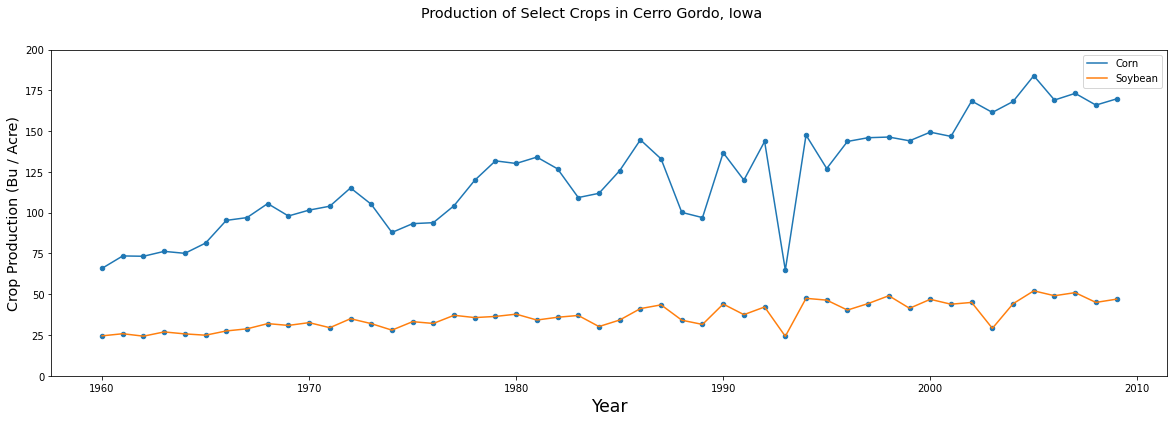

In [53]:
# Creating a subplot figure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,6))

# Plotting the corn and soybean data
corn_grain_data.plot.scatter(x="Year", y="Value", ax=axes)
corn_grain_data.plot.line(x="Year", y="Value", ax=axes, label="Corn")
soybean_data.plot.scatter(x="Year", y="Value", ax=axes)
soybean_data.plot.line(x="Year", y="Value", ax=axes, label="Soybean")

# legend = plt.legend()
# legend.get_texts()[0]

axes.set_ylim(0, 200)
axes.set_ylabel("Crop Production (Bu / Acre)", fontsize="x-large")
axes.set_xlabel("Year", fontsize="xx-large")

plt.suptitle("Production of Select Crops in Cerro Gordo, Iowa", fontsize="x-large")